In [183]:
import fastf1
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting as f1_plt
import pandas as pd
import utils as ut

In [184]:
# gettting the data
session = ut.get_session()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [185]:
q1, q2, q3 = ut.get_qualifying(session)
fast_mag = q3.pick_driver('MAG')
fast_ver = q3.pick_driver('VER')

In [186]:
print(fast_mag.pick_lap(25)["Sector1Time"])
print(fast_mag.pick_lap(25)["Sector2Time"])
print(fast_mag.pick_lap(25)["Sector3Time"])

24   0 days 00:00:18.410000
Name: Sector1Time, dtype: timedelta64[ns]
24   0 days 00:00:36.290000
Name: Sector2Time, dtype: timedelta64[ns]
24   0 days 00:00:16.974000
Name: Sector3Time, dtype: timedelta64[ns]


In [187]:
print(fast_ver.pick_lap(22)["Sector1Time"])
print(fast_ver.pick_lap(22)["Sector2Time"])
print(fast_ver.pick_lap(22)["Sector3Time"])

47   0 days 00:00:18.331000
Name: Sector1Time, dtype: timedelta64[ns]
47   0 days 00:00:36.607000
Name: Sector2Time, dtype: timedelta64[ns]
47   0 days 00:00:16.939000
Name: Sector3Time, dtype: timedelta64[ns]


In [188]:
best_lap_mag = fast_mag.pick_lap(25).get_car_data()
best_lap_mag_pos = fast_mag.pick_lap(25).get_pos_data(pad=1, pad_side='both')
best_lap_tel_mag = fast_mag.pick_lap(25).get_telemetry()

best_lap_ver = fast_ver.pick_lap(22).get_car_data()
best_lap_ver_pos = fast_ver.pick_lap(22).get_pos_data(pad=1, pad_side='both')
best_lap_tel_ver = fast_ver.pick_lap(22).get_telemetry()

In [189]:
best_lap_mag_pos

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-11-11 19:49:19.909,OnTrack,-4196,-2087,7766,pos,-1 days +23:59:59.907000,0 days 01:03:15.119000
1,2022-11-11 19:49:20.169,OnTrack,-4139,-2310,7772,pos,0 days 00:00:00.167000,0 days 01:03:15.379000
2,2022-11-11 19:49:20.389,OnTrack,-4091,-2498,7777,pos,0 days 00:00:00.387000,0 days 01:03:15.599000
3,2022-11-11 19:49:20.609,OnTrack,-4047,-2670,7785,pos,0 days 00:00:00.607000,0 days 01:03:15.819000
4,2022-11-11 19:49:20.749,OnTrack,-4016,-2790,7787,pos,0 days 00:00:00.747000,0 days 01:03:15.959000
...,...,...,...,...,...,...,...,...
266,2022-11-11 19:50:30.709,OnTrack,-4389,-1299,7746,pos,0 days 00:01:10.707000,0 days 01:04:25.919000
267,2022-11-11 19:50:30.969,OnTrack,-4315,-1609,7752,pos,0 days 00:01:10.967000,0 days 01:04:26.179000
268,2022-11-11 19:50:31.308,OnTrack,-4264,-1815,7756,pos,0 days 00:01:11.306000,0 days 01:04:26.518000
269,2022-11-11 19:50:31.508,OnTrack,-4220,-1993,7763,pos,0 days 00:01:11.506000,0 days 01:04:26.718000


In [190]:
best_lap_ver_pos

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2022-11-11 19:49:37.069,OnTrack,-4209,-2037,7764,pos,-1 days +23:59:59.844000,0 days 01:03:32.279000
1,2022-11-11 19:49:37.429,OnTrack,-4107,-2438,7776,pos,0 days 00:00:00.204000,0 days 01:03:32.639000
2,2022-11-11 19:49:37.789,OnTrack,-4058,-2631,7783,pos,0 days 00:00:00.564000,0 days 01:03:32.999000
3,2022-11-11 19:49:38.109,OnTrack,-3977,-2937,7792,pos,0 days 00:00:00.884000,0 days 01:03:33.319000
4,2022-11-11 19:49:38.488,OnTrack,-3881,-3296,7801,pos,0 days 00:00:01.263000,0 days 01:03:33.698000
...,...,...,...,...,...,...,...,...
271,2022-11-11 19:50:48.249,OnTrack,-4374,-1361,7747,pos,0 days 00:01:11.024000,0 days 01:04:43.459000
272,2022-11-11 19:50:48.469,OnTrack,-4319,-1592,7752,pos,0 days 00:01:11.244000,0 days 01:04:43.679000
273,2022-11-11 19:50:48.709,OnTrack,-4274,-1777,7756,pos,0 days 00:01:11.484000,0 days 01:04:43.919000
274,2022-11-11 19:50:49.069,OnTrack,-4184,-2133,7767,pos,0 days 00:01:11.844000,0 days 01:04:44.279000


In [231]:
from datetime import datetime


gaps = []


for i in range(len(best_lap_mag_pos)):
    time1 = best_lap_mag_pos["Time"][i]
    time2 = best_lap_ver_pos["Time"][i]

    gap = time1 - time2
    # gap_sec = gap.strftime("%H:%M:%S")

    gaps.append(gap.total_seconds())

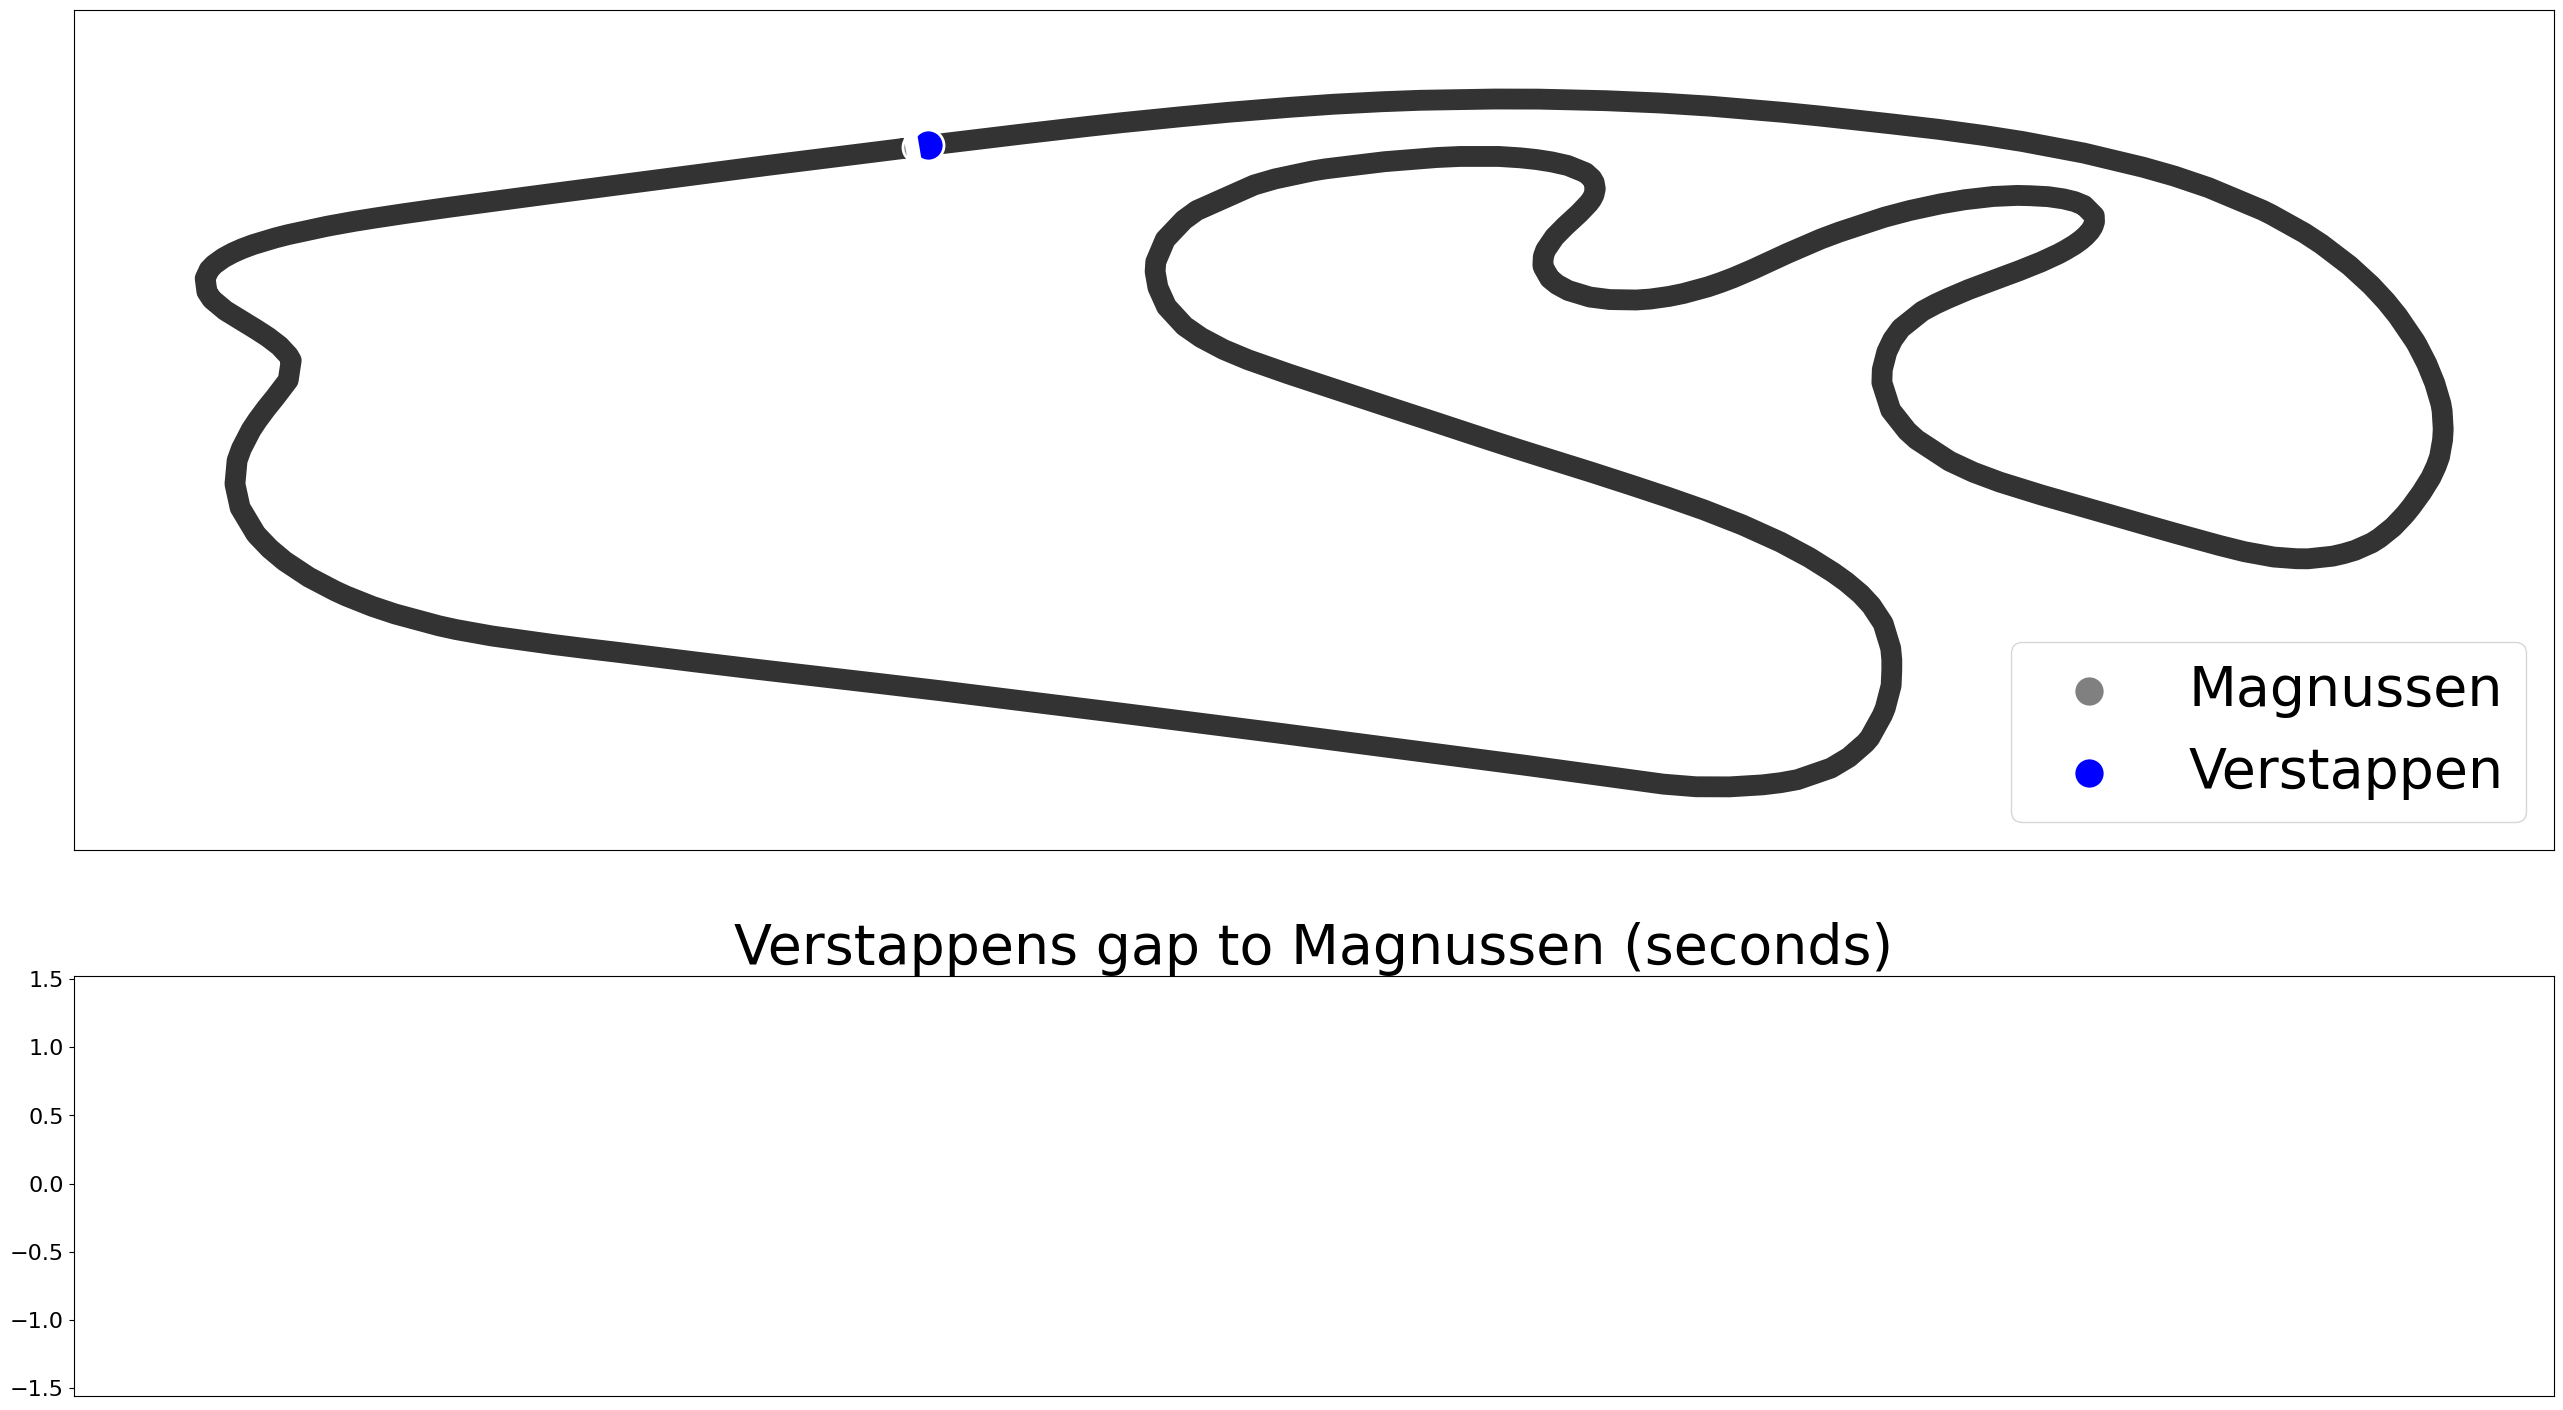

In [232]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_plot(i, scat_mag, scat_ver, line_mag, line_ver):

    line_mag.set_data(range(i), [0 for _ in range(i)])
    line_ver.set_data(range(i), gaps[:i])

    plot_x_mag = best_lap_mag_pos["X"][i]
    plot_y_mag = best_lap_mag_pos["Y"][i]
    scat_mag.set_offsets((plot_y_mag, -plot_x_mag))


    plot_x_ver = best_lap_ver_pos["X"][i]
    plot_y_ver = best_lap_ver_pos["Y"][i]
    scat_ver.set_offsets((plot_y_ver, -plot_x_ver))
    
    return scat_mag, scat_ver, line_mag, line_ver

numframes = len(best_lap_mag_pos)


plot_x_mag = best_lap_mag_pos["X"][0]
plot_y_mag = best_lap_mag_pos["Y"][0]


plot_x_ver = best_lap_ver_pos["X"][0]
plot_y_ver = best_lap_ver_pos["Y"][0]

data = range(numframes)


line_x = best_lap_mag_pos["X"][0]
line_y = best_lap_mag_pos["Y"][0]

race_line_x = list(best_lap_mag_pos["X"])
race_line_y = list(best_lap_mag_pos["Y"])

race_line_x.append(race_line_x[0])
race_line_y.append(race_line_y[0])



fig, ax = plt.subplots(2,1, figsize=(32,18), gridspec_kw={'height_ratios': [2, 1]})

ax[0].plot(pd.DataFrame(race_line_y), -pd.DataFrame(race_line_x), label='MAG', c="black", linewidth=15, alpha=0.8, zorder = 0)
ax[0].plot([line_y, line_y- 50], [-line_x - 300, -line_x + 300], c = "white", linewidth=10)

speed_line_mag = ax[1].plot(range(0), [0 for _ in range(0)], c="gray")
speed_line_ver = ax[1].plot(range(0), gaps[:0], c="blue")


scat_mag = ax[0].scatter(plot_y_mag, -plot_x_mag, c="gray", s=500, linewidths=2, edgecolors='white')
scat_ver = ax[0].scatter(plot_y_ver, -plot_x_ver, c="blue", s=500, linewidths=2, edgecolors='white')


ax[0].legend([scat_mag, scat_ver], ["Magnussen", "Verstappen"], fontsize = 40)
ax[0].set_xlim([-6000, 5500])
ax[0].set_ylim([-2500, 5500])
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)

ax[1].set_xlim([0, numframes])

ax[1].set_ylim([min(gaps) - .2, max(gaps) + .2])

ax[1].xaxis.set_visible(False)
ax[1].set_title("Verstappens gap to Magnussen (seconds)", fontsize = 40)
ax[1].yaxis.set_tick_params(labelsize=16)

ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                fargs=[scat_mag, scat_ver, speed_line_mag[0], speed_line_ver[0]], blit = False, interval=500, repeat=True)


plt.show()
# # To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=15,
#                                 metadata=dict(artist='Sebastian'))
# ani.save('./figures/lap_animation.gif', writer=writer)

# to save the animation using FFMpegWritter as a mp4
writervideo = animation.FFMpegWriter(fps=15) # brew install ffmpeg (if not working)
ani.save('./figures/lap_animation.mp4', writer=writervideo)


